# Auto-MPG Data Visualization Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
mpg_data=pd.read_csv("pandas datasets/auto-mpg.csv")
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
mpg_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [4]:
mpg_data.shape

(398, 9)

In [5]:
mpg_data["car name"].value_counts()

car name
ford pinto             6
ford maverick          5
amc matador            5
toyota corolla         5
amc hornet             4
                      ..
amc concord dl         1
volkswagen rabbit l    1
mazda glc custom l     1
mazda glc custom       1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [6]:
mpg_data.shape

(398, 9)

In [7]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
mpg_data["car name"].nunique()

305

In [9]:
try:
    mpg_data["horsepower"].astype("int")
except Exception as e:
    print(e)

invalid literal for int() with base 10: '?'


In [10]:
try:
    mpg_data["horsepower"]=pd.to_numeric(mpg_data["horsepower"])

except Exception as e:
    print(e)

Unable to parse string "?" at position 32


In [11]:
hp_is_digit=pd.DataFrame(mpg_data["horsepower"].str.isdigit())
hp_is_digit

,horsepower
0,True
1,True
2,True
3,True
4,True
...,...
393,True
394,True
395,True
396,True


In [12]:
# Fetching rows which are not digits
mpg_data[hp_is_digit["horsepower"]==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [13]:
# replacing strings with np.nan (missing values)
mpg_data["horsepower"]=mpg_data["horsepower"].replace("?",np.nan)

In [14]:
mpg_data["horsepower"]

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [15]:
mpg_data["horsepower"].dtype

dtype('O')

In [16]:
mpg_data["horsepower"]=mpg_data["horsepower"].astype("float64")

In [17]:
mpg_data["horsepower"].dtype

dtype('float64')

In [18]:
mpg_data["horsepower"].median()

93.5

In [19]:
mpg_data["horsepower"].mean()

np.float64(104.46938775510205)

In [20]:
mpg_data["horsepower"]=mpg_data["horsepower"].fillna(mpg_data["horsepower"].median())

In [21]:
mpg_data["car name"].nunique()

305

In [22]:
mpg_data.drop(["car name"],axis=1,inplace=True)

In [23]:
mpg_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [24]:
mpg_data["origin"].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [25]:
mpg_data["origin"]=mpg_data["origin"].map({1:"USA",
                                           2:"Europe",
                                           3:"Japan"})

In [26]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [27]:
mpg_data.origin.value_counts()

origin
USA       249
Japan      79
Europe     70
Name: count, dtype: int64

In [28]:
mpg_data.duplicated().sum()

np.int64(0)

In [29]:
mpg_data.to_csv("auto-mpg-cleaned.csv")

# what is the distribution of mpg in the dataset?

In [30]:
int(np.sqrt(len(mpg_data)))

19

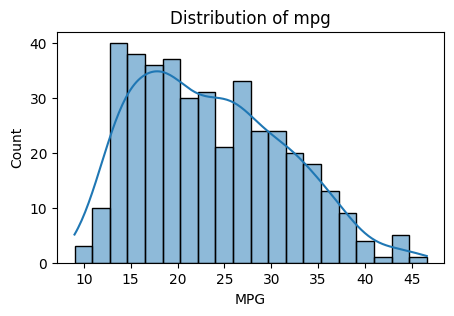

In [31]:
plt.figure(figsize=(5,3))
sns.histplot(data=mpg_data,x="mpg",bins=20,kde=True)
plt.title("Distribution of mpg")
plt.xlabel("MPG")
plt.savefig('Distribution of mpg.png')

In [32]:
np.linspace(mpg_data["mpg"].min(),mpg_data["mpg"].max(),21)

array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
       25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
       42.84, 44.72, 46.6 ])

# Insight:Most cars have mpg in range of 12.76 to 29.68

## 2.How many cars are from each origin(USA,Europe,Japan)

In [ ]:
plt.figure(figsize=(8,4))
ax=sns.countplot(data=mpg_data,y="origin",color="g",width=0.4)
for container in ax.containers:
    ax.bar_label(container)
plt.title("car origin count")
plt.show()

# What is proportion of cars are from each origin(USA,Europe,Japan)


In [ ]:
car_count=mpg_data["origin"].value_counts()
car_count

In [ ]:
plt.figure(figsize=(5,4))
plt.pie(x=car_count,
        labels=car_count.index,
        autopct="%1.3f%%",
       explode=[0,0,0.3]);

        

In [ ]:
# how can get in percentage
car_count=mpg_data["origin"].value_counts(normalize=True)*100
car_count

## more than 50 percentage of car from USA(62%) country

# 4. What percentage of cars belong to each cylinder category?

In [ ]:
cylinder_count=mpg_data["cylinders"].value_counts(normalize=True)*100
cylinder_count

In [ ]:
plt.figure(figsize=(5,4))
plt.pie(x=cylinder_count,
        labels=cylinder_count.index,
        autopct="%1.2f%%",
       explode=[0,0,0,0.4,0.8]);
plt.title("Percentage of Cars by cylinders")
plt.show()

## Insight: 50% cars are 4-cylinder versions and 25% belong to 8-cylinder cars

# what is the relationship between horsepower and weight of cars?

In [ ]:
mpg_data.columns

In [ ]:
mpg_data[["horsepower","weight"]].corr()

## Insight: Horse power and Weight are highly correlated indicating more the weight high chance of horspower being high

In [ ]:
sns.regplot(data=mpg_data,x="horsepower",y="weight",line_kws={"color":"green"},
           scatter_kws={"marker":"d","color":"magenta"})
plt.title("Horsepower vs Weight")

# How does MPG vary across different number of cyclinders?

In [ ]:
sns.barplot(data=mpg_data,x="cylinders",y="mpg",estimator="median")

## insight: 4- cylinder cars have more fuel economy then 6 and 8 cylinder cars

In [ ]:
sns.boxplot(data=mpg_data,x="cylinders",y="mpg")
plt.title("mpg distribution across cylinders")
plt.xlabel("Cylinders")
plt.ylabel("mpg")
plt.show()

# what are the relationship amoung horsepower and acceleration?

In [ ]:
mpg_data[["horsepower","acceleration"]].corr()

In [ ]:
sns.regplot(data=mpg_data,x="horsepower",y="acceleration",line_kws={"color":"red"})
plt.axvline(198,color="magenta")
plt.axhline(10,color="magenta")
plt.axvline(52,color="g")
plt.axhline(24.5,color="g")

## insight:High horse power cars have less time to accelerate(0-60mph) compared to low horse power cars


# How does horsepower vary by origin?

In [ ]:
mpg_data.groupby(by="origin")["horsepower"].median()

In [ ]:
sns.barplot(data=mpg_data,x="origin",y="horsepower",width=0.4,
            estimator="median",color="red")

## Insight:USA tend to manufacture high horse power cars where as japan and eroupe manfacture low horse power cars

# what is the trend of mpg across different years?

In [ ]:
mpg_data.groupby(by="model year")["mpg"].mean()

In [ ]:
mpg_data.groupby(by="model year")["mpg"].mean().plot(kind="line",marker="d")
plt.title("Average MPG  over model years")
plt.xlabel("Model Year")
plt.ylabel("Average MPG")
plt.show()

In [ ]:
# by using seaborn
sns.lineplot(data=mpg_data, x='model year', y='mpg')

## Insight:Average MPG(mileage/fuel economy) is increasing over years

# what is the distribution of displacement in the dataset?

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=mpg_data,x="displacement",bins=20,kde=True)
plt.title("Displacement")
plt.show()

## Insight: most cars have engine displacement <150 cubic inches

# How does the weight affect the mpg

In [ ]:
mpg_data[['weight','mpg']].corr()

In [ ]:
sns.regplot(data=mpg_data,x="weight",y="mpg",marker="d",scatter_kws={"color":"g","s":10},scatter=True)

## Insight: Heavier cars(high weight) tend to have less milleage(mpg)

# what is the relationship between mpg and acceleration


In [ ]:
mpg_data[["mpg","acceleration"]].corr()

In [ ]:
sns.regplot(data=mpg_data,x="mpg",y="acceleration",marker="^",scatter=True
            ,scatter_kws={"color":"m"},line_kws=({"color":"g"}))
plt.title("Mpg vs Acceleration")

# Insight: Low acceleration (time for 0-60mph speed up) cars trend to have high mileage (mpg) but relationship is not strong

In [ ]:
mpg_data["cylinders"]=mpg_data["cylinders"].astype("object")

In [ ]:
numerical_cols=mpg_data.select_dtypes(include=np.number).columns

In [ ]:
mpg_data[numerical_cols]

In [ ]:
mpg_data[numerical_cols].corr()

In [ ]:
sns.heatmap(data=mpg_data[numerical_cols].iloc[:-1,:-1].corr(),annot=True)

## Insight: cyclinders,displacement,horse power,weight are infleuing mileage(higher the weight less the milleage)

# What relationship can be inferred between MPG,horsepower, and weight?

In [ ]:
mpg_data[["mpg","horsepower","weight"]].corr()

In [ ]:
sns.heatmap(data=mpg_data[["mpg","horsepower","weight"]].corr(),annot=True)

In [ ]:
sns.pairplot(mpg_data[["mpg","horsepower","weight"]],
             diag_kind="hist",markers=["d"],
             kind="reg",
             plot_kws={"scatter_kws":{"color":"green"},
                       "line_kws":{"color":"magenta"}
                      },height=2,aspect=1.8)

## Insight: there is strong negative correlation for  horsepower and weight with mpg.and there is strong postive correlation between horsepower and weight(if car horsepower is more it tend to weight)

# what is the disribution of mpg for different car origins

In [ ]:
sns.barplot(data=mpg_data,x="origin",y="mpg")

## Insight: japan origin car has high mpg when compared to europe and usa.the usa origin made less mpg cars.

# what is the disribution of acceleration for different car origins.

In [ ]:
sns.barplot(data=mpg_data,x="origin",y="acceleration")

## Insight: Eroupe origin cars has more acceleration cars when compare to USA and Japan.

# how does the weight of cars vary by their origin?

In [ ]:
sns.barplot(data=mpg_data,x="origin",y="weight")

In [ ]:
sns.boxplot(data=mpg_data,x="origin",y="weight")
plt.title("Weight Distribution by car origin")
plt.xlabel("Origin (1= USA,2= Europe,3= Japan)")
plt.ylabel("weight")
plt.show()
           

## Insight:USA origin made heavier cars than europe and japan.

#  what is the relationship between mpg and horsepower?

In [ ]:
mpg_data[["mpg","horsepower"]].corr()

In [ ]:
sns.regplot(data=mpg_data,x="horsepower",y="mpg",scatter_kws={'color':'blue'},
            line_kws={'color':'r'})